# Predicting Airline Passenger Satisfaction

**Objective:** Predict passenger satisfaction based on flight and service-related factors.

**Why it matters?** Insights into passenger satisfaction help airlines improve services, leading to enhanced customer experience and loyalty.


In [ ]:
# Import libraries and setup dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/MLBA/Project/airline_passenger_satisfaction.csv')
df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Boo

In [ ]:
# # List of numerical columns
# numerical_columns = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
#                      'Departure and Arrival Time Convenience', 'Seat Comfort',
#                      'On-board Service', 'Leg Room Service', 'Cleanliness',
#                      'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
#                      'In-flight Entertainment', 'Baggage Handling']

# # Convert satisfaction to binary for correlation matrix
# df['Satisfaction_Binary'] = df['Satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)

# # Add satisfaction binary column to the numerical columns
# correlation_columns = numerical_columns + ['Satisfaction_Binary']

# # Generate correlation matrix
# correlation_matrix = df[correlation_columns].corr()

# # Plot correlation matrix with values
# plt.figure(figsize=(16, 12))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, annot_kws={"size": 10})
# plt.title('Correlation Matrix with Values', pad=20)
# plt.xticks(rotation=90)
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()

In [ ]:
# # Flight Distance Distribution by Satisfaction (Histogram)
# plt.figure(figsize=(10, 6))
# df[df['Satisfaction'] == 'Satisfied']['Flight Distance'].hist(alpha=0.5, label='Satisfied', bins=20, color='green')
# df[df['Satisfaction'] == 'Neutral or Dissatisfied']['Flight Distance'].hist(alpha=0.5, label='Neutral or Dissatisfied', bins=20, color='red')
# plt.title('Flight Distance Distribution by Satisfaction')
# plt.xlabel('Flight Distance')
# plt.ylabel('Number of Passengers')
# plt.legend()
# plt.tight_layout()
# plt.show()


In [ ]:
# # In-flight Entertainment vs Satisfaction (Box Plot)
# plt.figure(figsize=(10, 6))
# df.boxplot(column=['In-flight Entertainment'], by='Satisfaction', grid=False)
# plt.title('In-flight Entertainment vs Satisfaction')
# plt.suptitle('')
# plt.xlabel('Satisfaction')
# plt.ylabel('In-flight Entertainment Rating')
# plt.tight_layout()
# plt.show()

In [ ]:
# # Food and Drink Ratings vs Satisfaction
# food_drink_satisfaction = df.groupby(['Food and Drink', 'Satisfaction']).size().unstack().fillna(0)
# food_drink_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
# plt.title('Food and Drink Ratings vs Satisfaction')
# plt.xlabel('Food and Drink Rating')
# plt.ylabel('Number of Passengers')
# plt.legend(title='Satisfaction', loc='upper left')
# plt.tight_layout()
# plt.show()

In [ ]:
# In-flight Wifi Service vs Satisfaction
# wifi_satisfaction = df.groupby(['In-flight Wifi Service', 'Satisfaction']).size().unstack().fillna(0)
# wifi_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
# plt.title('In-flight Wifi Service vs Satisfaction')
# plt.xlabel('In-flight Wifi Service Rating')
# plt.ylabel('Number of Passengers')
# plt.legend(title='Satisfaction', loc='upper left')
# plt.tight_layout()
# plt.show()

In [ ]:
# # Split data by satisfaction levels
# satisfied_flights = df[df['Satisfaction'] == 'Satisfied']
# dissatisfied_flights = df[df['Satisfaction'] == 'Neutral or Dissatisfied']

# # Departure Delay vs Satisfaction
# plt.figure(figsize=(10, 6))
# plt.scatter(satisfied_flights['Departure Delay'], [1] * len(satisfied_flights), label="Satisfied", alpha=0.5, color='green')
# plt.scatter(dissatisfied_flights['Departure Delay'], [0] * len(dissatisfied_flights), label="Neutral or Dissatisfied", alpha=0.5, color='red')
# plt.title('Departure Delay vs Satisfaction')
# plt.ylabel('Satisfaction (1 = Satisfied, 0 = Neutral or Dissatisfied)')
# plt.xlabel('Departure Delay (minutes)')
# plt.legend()
# plt.tight_layout()
# plt.show()

**Splitting Data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
plt.style.use('ggplot')

df['Arrival Delay'].fillna(float(df['Arrival Delay'].mode()[0]), inplace= True)  # .mode return pandas series
scaler = StandardScaler()

numerical_col = ['Flight Distance', 'Departure Delay','Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking',
                 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink',
                 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']
categorical_col = ['Class']

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(df['Satisfaction'])
print(y)

X = df.drop(columns=['ID', 'Gender','Age', 'Type of Travel', 'Customer Type','Satisfaction'])
X['Class'] = label_encoder.fit_transform(X['Class'])  # Convert categorical columns to numerical
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


[0 1 1 ... 0 1 0]


<ipython-input-10-f5cb45e90ca0>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay'].fillna(float(df['Arrival Delay'].mode()[0]), inplace= True)  # .mode return pandas series


**Lasso/Ridge**

0


<ipython-input-11-a1e5d64d62ec>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', 18)


0.1315277628568716
0.13240099226198915


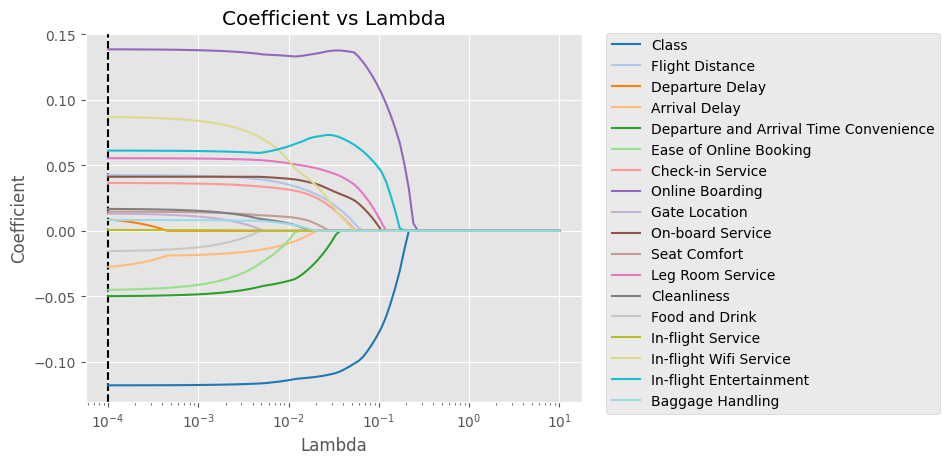

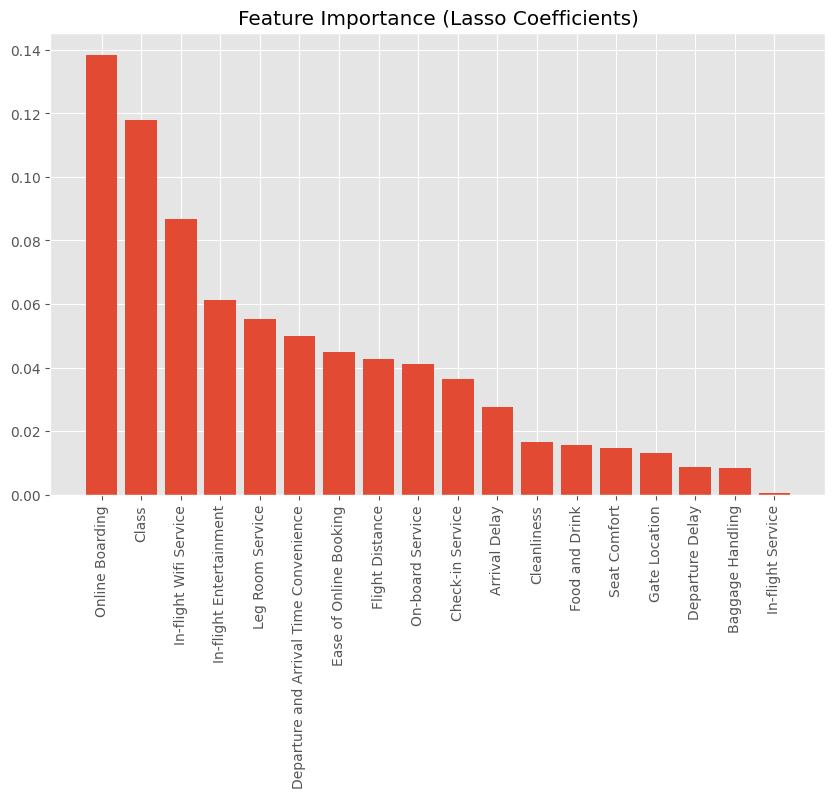

In [ ]:
# Run Lasso on dataset
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.cm as cm

num_lambdas = 100
lambdas = np.logspace(-4, 1, num_lambdas)
mse_train = []
mse_test = []

y_train_hat = np.zeros((y_train.shape[0], num_lambdas))
y_test_hat = np.zeros((y_test.shape[0], num_lambdas))
coefficients = np.zeros((X_train.shape[1], num_lambdas))

num_predictors = X_train.shape[1]
all_predictors = list(categorical_col) + list(numerical_col)

for i, current_lambda in enumerate(lambdas):
  model = Lasso(alpha=current_lambda)
  model.fit(X_train, y_train)
  y_train_hat[:,i] = model.predict(X_train)
  coefficients[:,i] = model.coef_
  y_test_hat[:,i] = model.predict(X_test)
  mse_train.append(mean_squared_error(y_train, y_train_hat[:,i]))
  mse_test.append(mean_squared_error(y_test, y_test_hat[:,i]))

# Store the tuned_mse, which is the lowest mse_test in our mse_test array (1 point)
tuned_mse = min(mse_test)
# Store minidx, the index of the lowest mse test within mse_test using the index function (1 point)
minidx = mse_test.index(tuned_mse)
print(minidx)
cmap = cm.get_cmap('tab20', 18)
colors = [cmap(i) for i in range(18)]

plt.axvline(x=lambdas[minidx], color='black', linestyle='--')

for i in range(num_predictors):
  plt.plot(lambdas, coefficients[i,:], label=all_predictors[i], color=colors[i])
  plt.xscale('log')
  plt.xlabel('Lambda')
  plt.ylabel('Coefficient')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.title('Coefficient vs Lambda')

# calculate mse test and train at the best lambda
mse_test_best = mse_test[minidx]
mse_train_best = mse_train[minidx]
print(mse_test_best)
print(mse_train_best)

lasso = Lasso(alpha=lambdas[minidx]) # Define lasso here with the best lambda
lasso.fit(X_train, y_train)

feature_importance = pd.Series(abs(lasso.coef_), index=X.columns).sort_values(ascending=False)

# Plot feature importance based on coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_importance.index, feature_importance.values)
plt.xticks(rotation=90)
plt.title('Feature Importance (Lasso Coefficients)')
plt.show()

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-0.1179464   0.04260497  0.01109603 -0.02998237 -0.05000754 -0.0454712
  0.03656019  0.13856833  0.01338794  0.04126155  0.01470697  0.05542893
  0.01685844 -0.01585088  0.00057462  0.08717844  0.06127393  0.00824802]
Model Intercept: 0.4347763319987681


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate performance metrics
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, model.predict(X_train))
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error (MSE) train: {mse_train:.4f}")
print(f"Mean Squared Error (MSE) test: {mse_test:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE) train: 0.1324
Mean Squared Error (MSE) test: 0.1315
R² Score: 0.4643
R² Score: 0.4643


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation on the model
cv_scores = cross_val_score(model, X, y, scoring='r2', cv=5)

# Print the cross-validation results
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of R² Scores: {np.std(cv_scores):.4f}")

Cross-Validation R² Scores: [0.40644008 0.27170853 0.50151346 0.5306423  0.53441315]
Mean R² Score: 0.4489
Standard Deviation of R² Scores: 0.1000


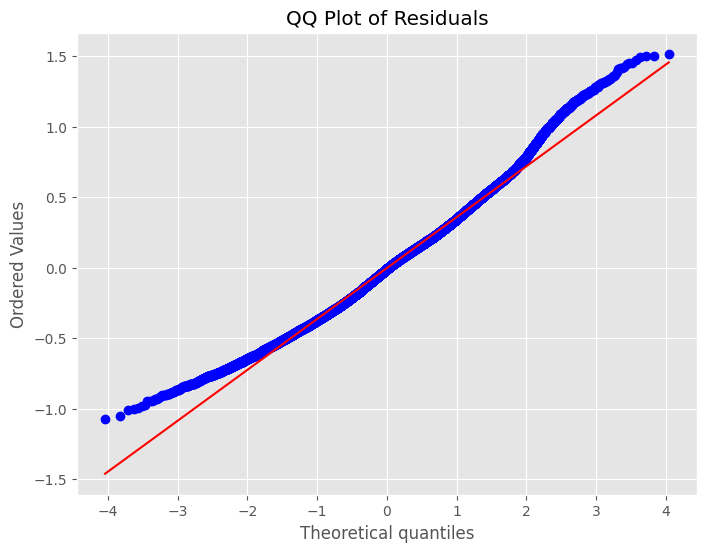

In [ ]:
import scipy.stats as stats

residuals = y_test - y_pred

# Generate QQ plot for residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

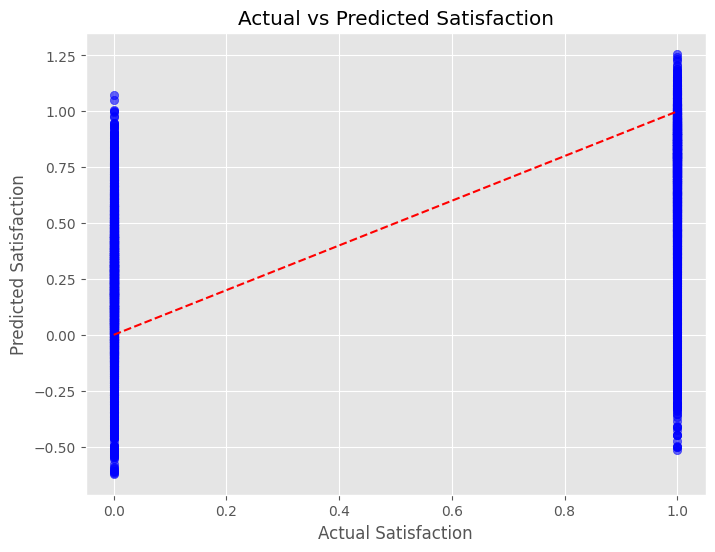

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Satisfaction')
plt.ylabel('Predicted Satisfaction')
plt.title('Actual vs Predicted Satisfaction')
plt.show()

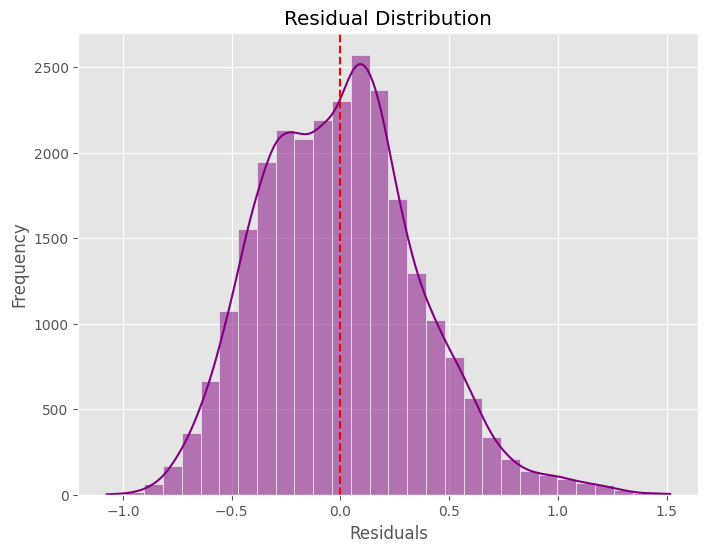

In [ ]:
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.axvline(0, color='red', linestyle='--')  # Mean residual line
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

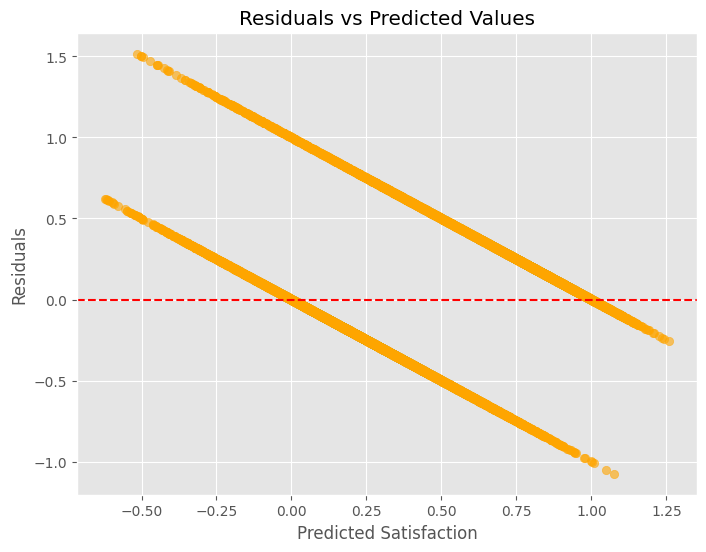

In [ ]:
# Residuals vs Predicted Values plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')  # Zero residual line
plt.xlabel('Predicted Satisfaction')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

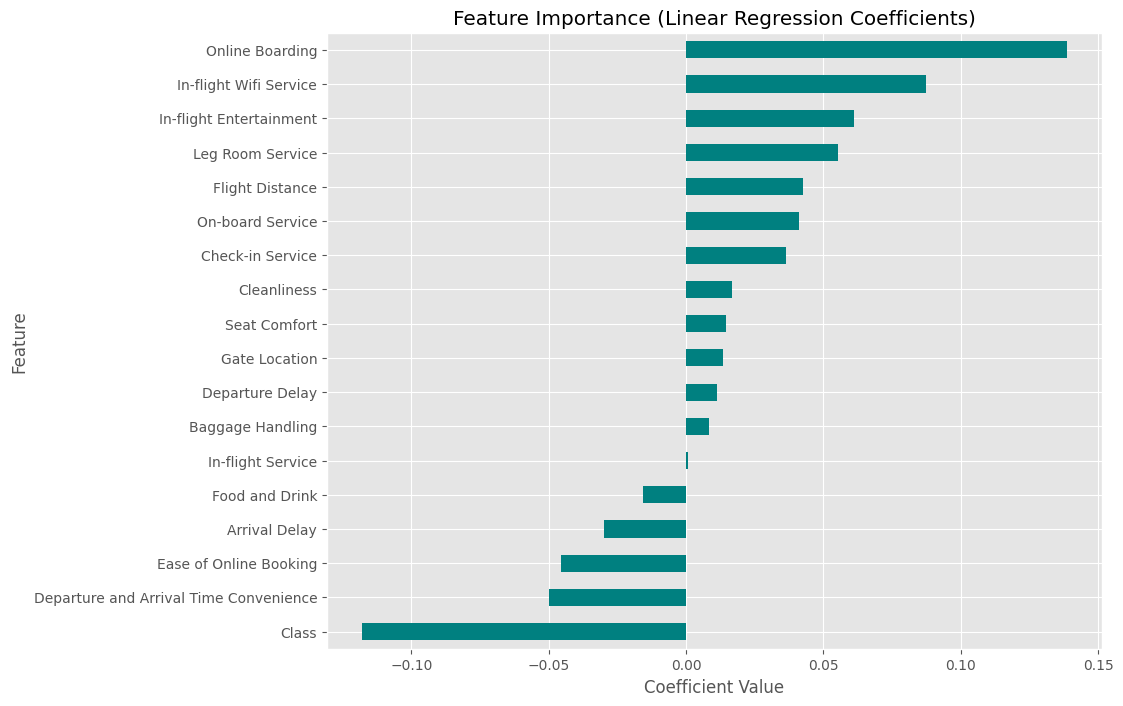

In [ ]:
# Ensure feature names are correctly assigned to coefficients

feature_names = X.columns.tolist()
coefficients = pd.Series(model.coef_, index=feature_names)

# Plot feature importance
plt.figure(figsize=(10, 8))
coefficients.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

**KNN Regression**

In [ ]:
# perform KNN regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# run KNN regression
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': list(range(1, 10))}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
y_pred_train = best_knn.predict(X_train)
y_pred_test = best_knn.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE Train: {mse_train}')
print(f'MSE Test: {mse_test}')

MSE Train: 0.04489578699426251
MSE Test: 0.05558787408700149


Optimal k value: {'n_neighbors': 9}


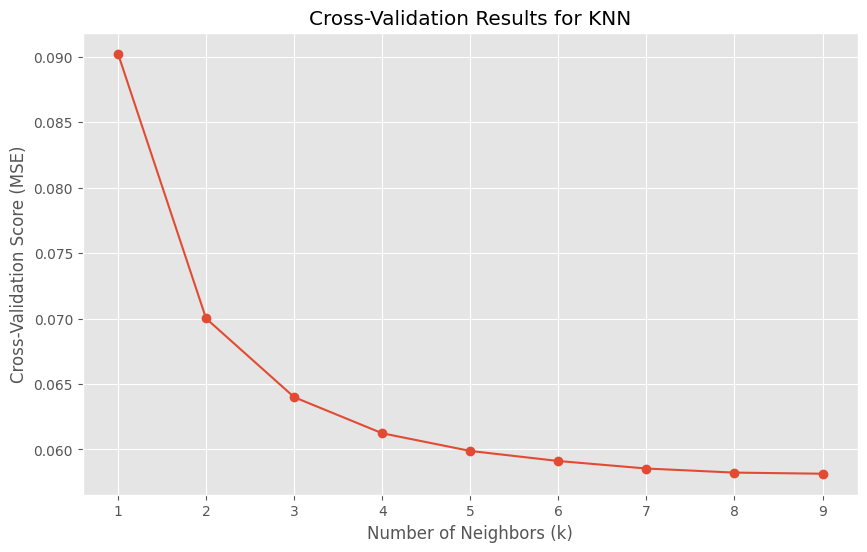

In [ ]:
# print optimal k value
print(f'Optimal k value: {grid_search.best_params_}')
# produce the plot to show the results of cross-validation
# Get cross-validation results
cv_results = grid_search.cv_results_
mean_scores = cv_results['mean_test_score']
# Convert scores to positive values (if using neg_mean_squared_error)
mean_scores = np.abs(mean_scores)

# Extract k values
k_values = [params['n_neighbors'] for params in cv_results['params']]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Score (MSE)')
plt.title('Cross-Validation Results for KNN')
plt.grid(True)
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
#                            param_grid=param_grid,
#                            cv=5,
#                            scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

In [ ]:
# Initialize the Decision Tree Classifier with tuned hyperparameters
decision_tree = DecisionTreeClassifier(
    criterion='entropy',         # Use entropy for split evaluation
    max_depth=None,                # Set the maximum depth of the tree
    min_samples_split=10,        # Require at least 10 samples to split a node
    min_samples_leaf=4,          # Require at least 4 samples in leaf nodes
    random_state=42              # Ensure reproducibility
)

# Train the model
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9352864182322144
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     14723
           1       0.93      0.92      0.92     11253

    accuracy                           0.94     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.94      0.94      0.94     25976



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = decision_tree.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[13960   763]
 [  918 10335]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     14723
           1       0.93      0.92      0.92     11253

    accuracy                           0.94     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.94      0.94      0.94     25976



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(random_state=42),
                         X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.92527718 0.90341084 0.93055128 0.94025254 0.94067601]
Mean Accuracy: 0.9280335694487218


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.06471358176778565


In [ ]:
mse_train = mean_squared_error(y_train, decision_tree.predict(X_train))
print(f"MSE Train: {mse_train}")

MSE Train: 0.026312750230982444


In [ ]:
# Decision tree textual visualization
tree_rules = export_text(decision_tree, feature_names=list(X.columns))
print(tree_rules)


|--- Online Boarding <= 0.18
|   |--- In-flight Wifi Service <= -1.67
|   |   |--- Cleanliness <= -2.12
|   |   |   |--- class: 0
|   |   |--- Cleanliness >  -2.12
|   |   |   |--- class: 1
|   |--- In-flight Wifi Service >  -1.67
|   |   |--- In-flight Wifi Service <= 0.58
|   |   |   |--- Class <= -0.15
|   |   |   |   |--- In-flight Entertainment <= 0.10
|   |   |   |   |   |--- Gate Location <= 0.41
|   |   |   |   |   |   |--- In-flight Entertainment <= -1.39
|   |   |   |   |   |   |   |--- In-flight Wifi Service <= -0.92
|   |   |   |   |   |   |   |   |--- Arrival Delay <= 3.06
|   |   |   |   |   |   |   |   |   |--- Gate Location <= -1.15
|   |   |   |   |   |   |   |   |   |   |--- Flight Distance <= 2.45
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- Flight Distance >  2.45
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Gate Locat

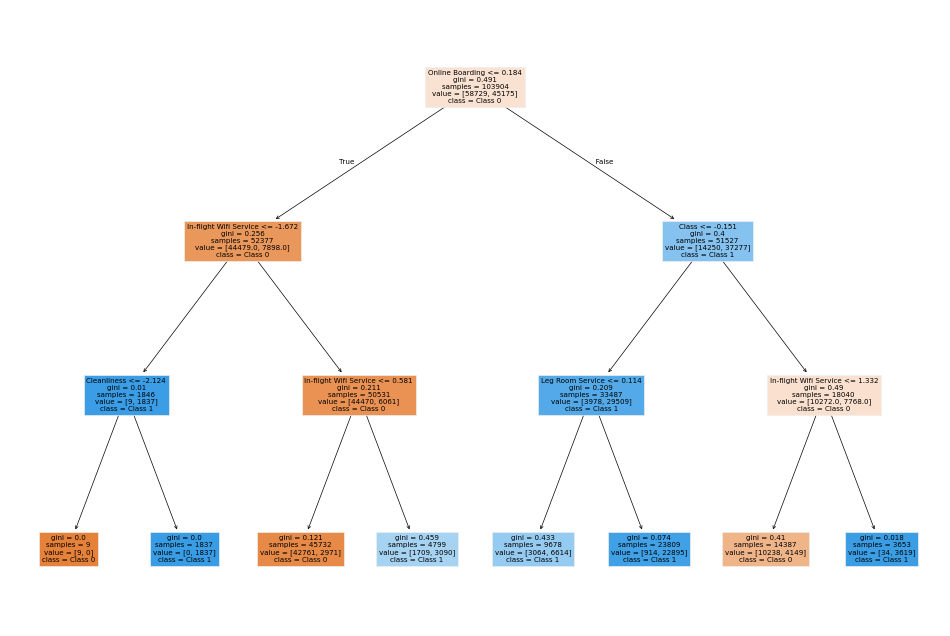

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()

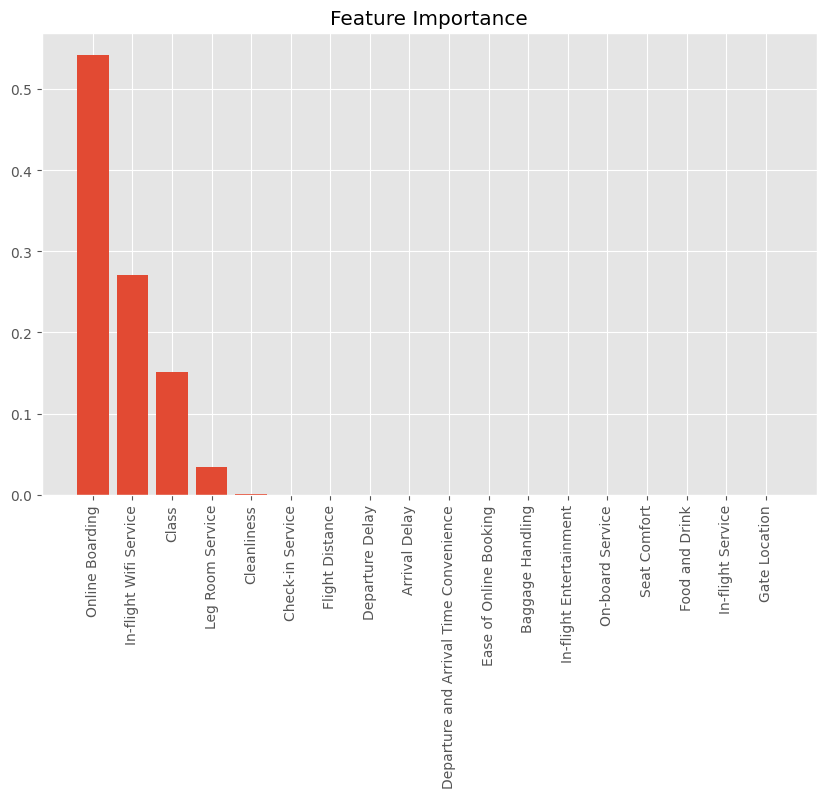

In [ ]:
import numpy as np

feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.show()

In [ ]:
# 2nd tree with lower depth

# Initialize the Decision Tree Classifier with tuned hyperparameters
decision_tree = DecisionTreeClassifier(
    criterion='entropy',         # Use entropy for split evaluation
    max_depth=4,                # Set the maximum depth of the tree
    min_samples_split=10,        # Require at least 10 samples to split a node
    min_samples_leaf=4,          # Require at least 4 samples in leaf nodes
    random_state=42              # Ensure reproducibility
)

# Train the model
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.12696335078534032


In [ ]:
train_mse = mean_squared_error(y_train, decision_tree.predict(X_train))
print(f"MSE Train: {train_mse}")

MSE Train: 0.12306552202032646


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8730366492146597
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     14723
           1       0.90      0.80      0.85     11253

    accuracy                           0.87     25976
   macro avg       0.88      0.86      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [ ]:
# Decision tree textual visualization
tree_rules = export_text(decision_tree, feature_names=list(X.columns))
print(tree_rules)


|--- Online Boarding <= 0.18
|   |--- In-flight Wifi Service <= -1.67
|   |   |--- Cleanliness <= -2.12
|   |   |   |--- class: 0
|   |   |--- Cleanliness >  -2.12
|   |   |   |--- class: 1
|   |--- In-flight Wifi Service >  -1.67
|   |   |--- In-flight Wifi Service <= 0.58
|   |   |   |--- Class <= -0.15
|   |   |   |   |--- class: 0
|   |   |   |--- Class >  -0.15
|   |   |   |   |--- class: 0
|   |   |--- In-flight Wifi Service >  0.58
|   |   |   |--- In-flight Wifi Service <= 1.33
|   |   |   |   |--- class: 0
|   |   |   |--- In-flight Wifi Service >  1.33
|   |   |   |   |--- class: 1
|--- Online Boarding >  0.18
|   |--- Class <= -0.15
|   |   |--- Leg Room Service <= 0.11
|   |   |   |--- Online Boarding <= 0.92
|   |   |   |   |--- class: 1
|   |   |   |--- Online Boarding >  0.92
|   |   |   |   |--- class: 1
|   |   |--- Leg Room Service >  0.11
|   |   |   |--- Cleanliness <= -0.60
|   |   |   |   |--- class: 1
|   |   |   |--- Cleanliness >  -0.60
|   |   |   |   |--- cla

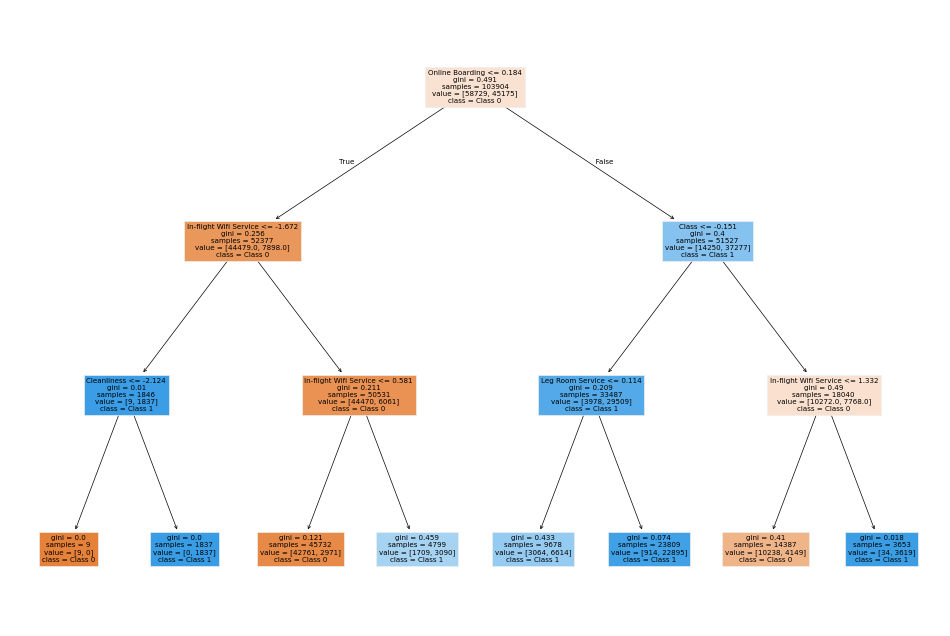

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()

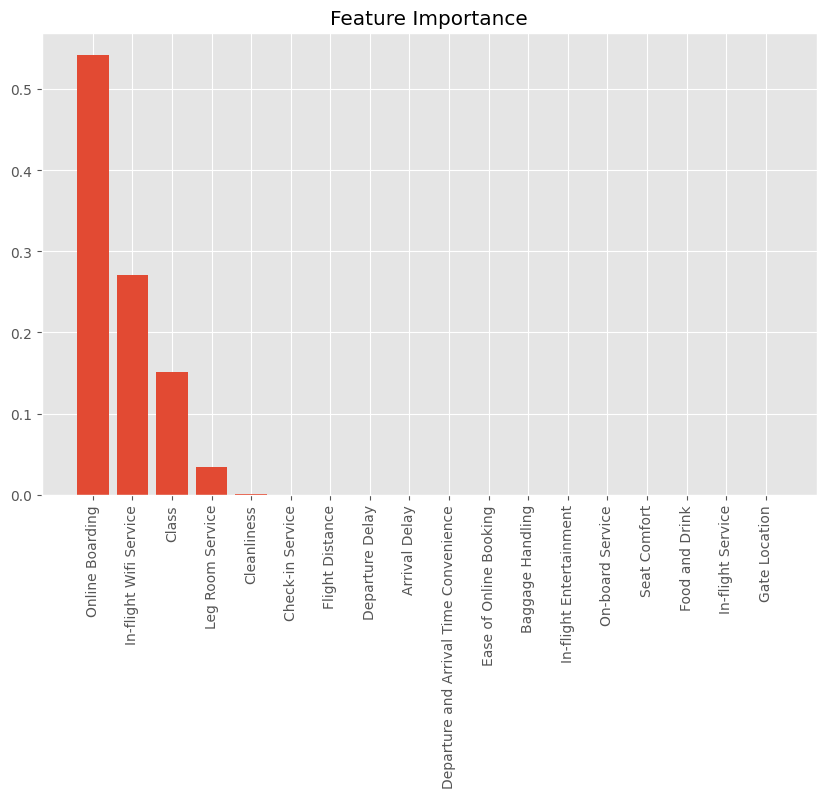

In [ ]:
import numpy as np

feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.show()

In [ ]:
# 3rd tree with even lower depth

# Initialize the Decision Tree Classifier with tuned hyperparameters
decision_tree = DecisionTreeClassifier(
    criterion='entropy',         # Use entropy for split evaluation
    max_depth=2,                # Set the maximum depth of the tree
    min_samples_split=10,        # Require at least 10 samples to split a node
    min_samples_leaf=2,          # Require at least 4 samples in leaf nodes
    random_state=42              # Ensure reproducibility
)

# Train the model
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8251847859562673
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     14723
           1       0.88      0.69      0.77     11253

    accuracy                           0.83     25976
   macro avg       0.84      0.81      0.82     25976
weighted avg       0.83      0.83      0.82     25976



In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.17481521404373268


In [ ]:
train_mse = mean_squared_error(y_train, decision_tree.predict(X_train))
print(f"MSE Train: {train_mse}")

MSE Train: 0.17146596858638743


In [ ]:
# Decision tree textual visualization
tree_rules = export_text(decision_tree, feature_names=list(X.columns))
print(tree_rules)


|--- Online Boarding <= 0.18
|   |--- In-flight Wifi Service <= -1.67
|   |   |--- class: 1
|   |--- In-flight Wifi Service >  -1.67
|   |   |--- class: 0
|--- Online Boarding >  0.18
|   |--- Class <= -0.15
|   |   |--- class: 1
|   |--- Class >  -0.15
|   |   |--- class: 0



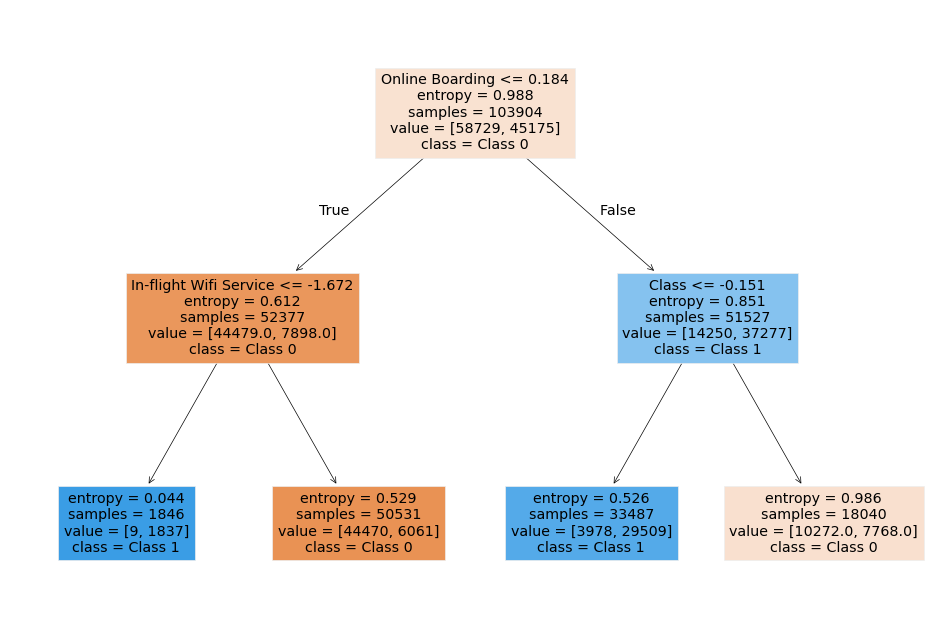

In [ ]:
# graph the tree

from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()

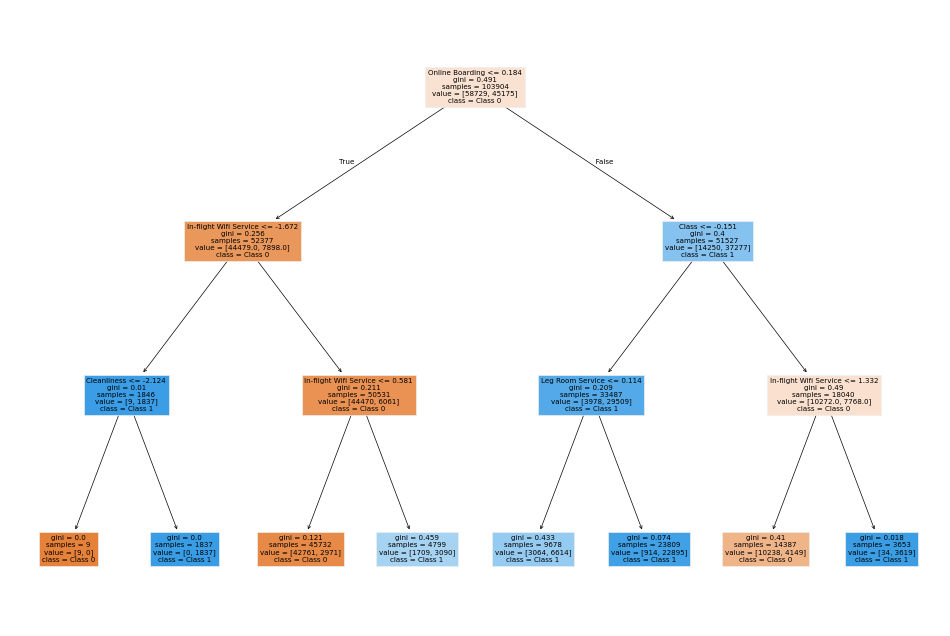

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()

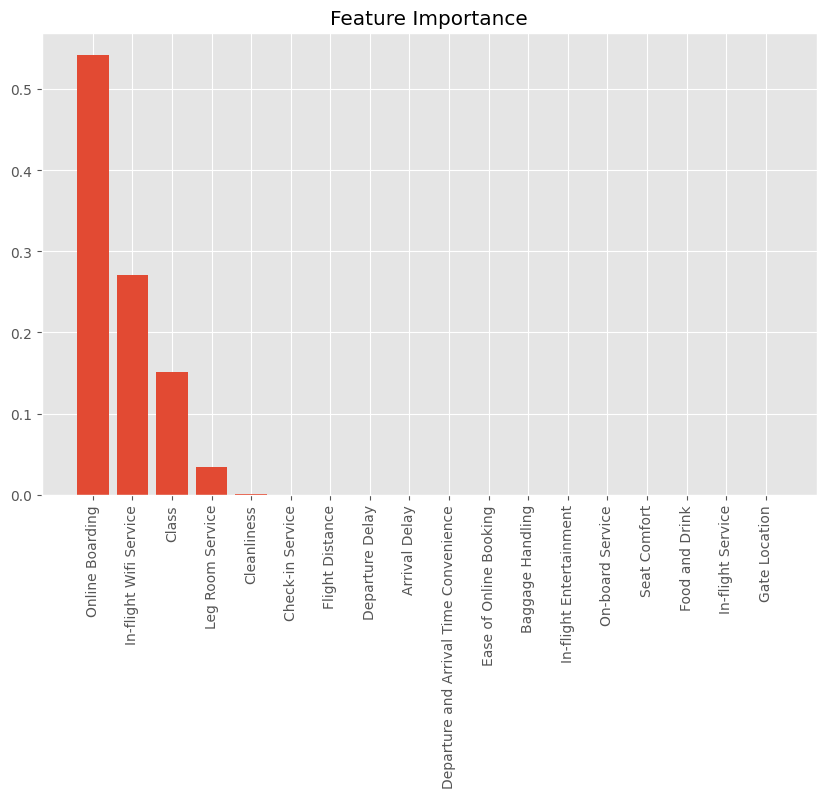

In [ ]:
import numpy as np

feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.show()

**Random Forrest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

max_features = int((np.sqrt(X_train.shape[1])))

rf = RandomForestClassifier(n_estimators= 50, max_depth=2,bootstrap=True, random_state=42, max_features=max_features)
rf.fit(X_train , y_train)



rf_cv = GridSearchCV(
    RandomForestRegressor(n_estimators=50, random_state=42, max_features=max_features),
    param_grid={'max_features':list(range(1,max_features+1))},
    scoring="neg_mean_squared_error")

rf_cv.fit(X_train, y_train)



GridSearchCV(estimator=RandomForestRegressor(max_features=4, n_estimators=50,
                                             random_state=42),
             param_grid={'max_features': [1, 2, 3, 4]},
             scoring='neg_mean_squared_error')

The tuned hyperparameters are: {'max_features': 4}
model MSE on the training set 0.1403507083461657
model MSE on the test set 0.13974437942716353
model MSE on the training set with cross validation 0.005250596704650448
model MSE on the test set with cross validation 0.036139882968894366
[0.18790957658734603, 0.031954708845412856, 0.0, 0.0, 0.0, 0.02152197468996453, 0.0, 0.35610960973612227, 0.0, 0.02486133623158875, 0.0553732148819722, 0.06696228852895629, 0.026524597840678954, 0.0018556096432661695, 0.0, 0.10617583042580621, 0.11477225116973662, 0.0059790014191491055]


Text(0.5, 1.0, 'RF Variable Importances')

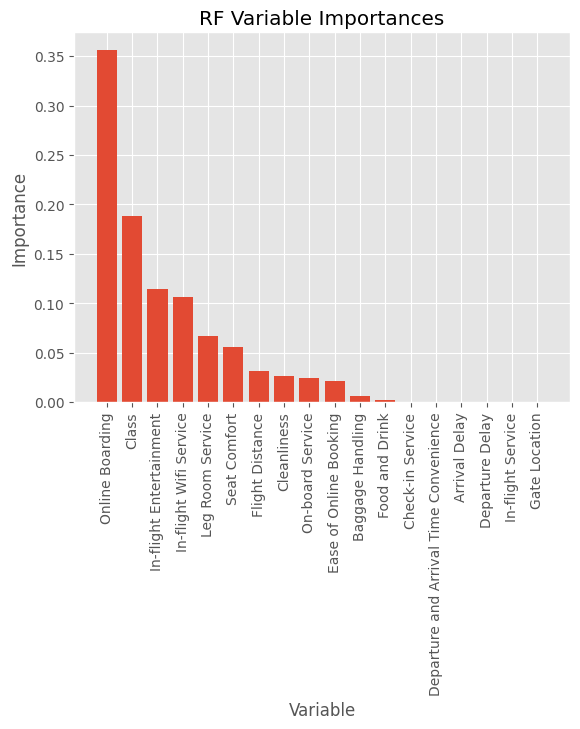

In [ ]:
y_hat_train = rf.predict(X_train)
mse_train = mean_squared_error(y_hat_train, y_train)

y_hat_test= rf.predict(X_test)
mse_test = mean_squared_error(y_hat_test, y_test)

yhat_train_rf_cv = rf_cv.predict(X_train)

mse_train_rf_cv = mean_squared_error(y_train, yhat_train_rf_cv)

yhat_test_rf_cv = rf_cv.predict(X_test)

mse_test_rf_cv = mean_squared_error(y_test, yhat_test_rf_cv)

print("The tuned hyperparameters are:", rf_cv.best_params_)

print(f'model MSE on the training set {(mse_train)}')
print(f'model MSE on the test set {(mse_test)}')
print(f'model MSE on the training set with cross validation {(mse_train_rf_cv)}')
print(f'model MSE on the test set with cross validation {(mse_test_rf_cv)}')

importances = list(rf.feature_importances_)
x_values = list(range(len(importances)))
# # Make a bar chart

sorted_indices_rf = np.argsort(importances)[::-1]
sorted_features =[X.columns[i] for i in sorted_indices_rf]
sorted_importances = [importances[i] for i in sorted_indices_rf]

print(importances)

plt.bar(x_values, sorted_importances, orientation = 'vertical')
plt.xticks(x_values, sorted_features, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('RF Variable Importances')



[0.1344393  0.0528073  0.01503702 0.01622687 0.02870439 0.04733936
 0.02380147 0.20262072 0.02544481 0.03278286 0.04667159 0.04744876
 0.02792659 0.01776212 0.02419456 0.16434735 0.06998089 0.02246403]


Text(0.5, 1.0, 'CV RF Variable Importances')

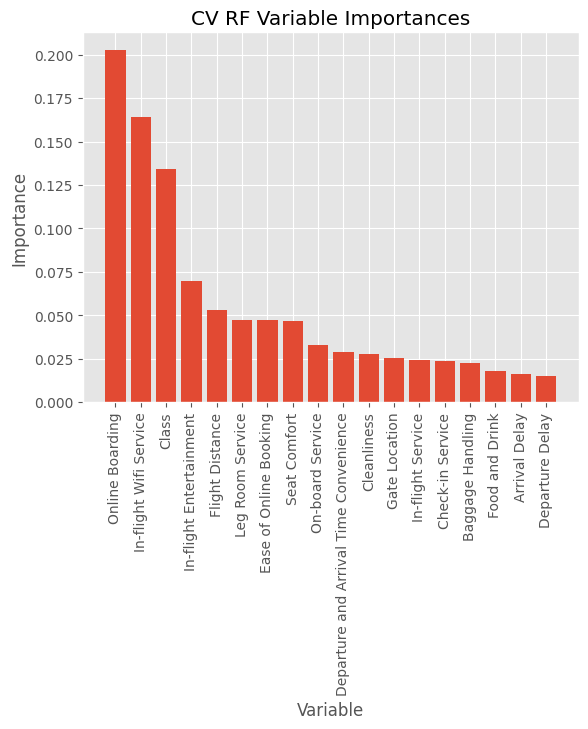

In [ ]:
importances_cv = list(rf_cv.best_estimator_.feature_importances_)
print(rf_cv.best_estimator_.feature_importances_)
sorted_indices_cv = np.argsort(importances_cv)[::-1]
sorted_features_cv =[X.columns[i] for i in sorted_indices_cv]
sorted_importances_cv = [importances_cv[i] for i in sorted_indices_cv]

x_values_cv = list(range(len(sorted_indices_cv)))
# # Make a bar chart

plt.bar(x_values_cv, sorted_importances_cv, orientation = 'vertical')
plt.xticks(x_values_cv,sorted_features_cv, rotation='vertical') # Tick labels for x axis
# # Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('CV RF Variable Importances')

**Boosting**

In [ ]:
from google.colab import files
import pandas as pd
from pandas import read_csv


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

num_trees = 20
decision_stump = DecisionTreeRegressor(max_depth=6)

adaboost = AdaBoostRegressor(estimator=decision_stump, n_estimators=num_trees, learning_rate=0.5)
adaboost.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = adaboost.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Train MSE: {mean_squared_error(y_train, adaboost.predict(X_train))}")
print(f"Test MSE: {mse}")
print(f"R-squared: {r2}")

print(adaboost.score(X_train, y_train))
print(adaboost.score(X_test, y_test))


Train MSE: 0.0652556664162389
Test MSE: 0.06677511978552082
R-squared: 0.7280465353503822
0.7344587496650902
0.7280465353503822


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(adaboost, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores:", -scores)
print("Average MSE:", -scores.mean())

Cross-validation scores: [0.07038473 0.08633751 0.06407501 0.06064023 0.06013338]
Average MSE: 0.06831417300120987


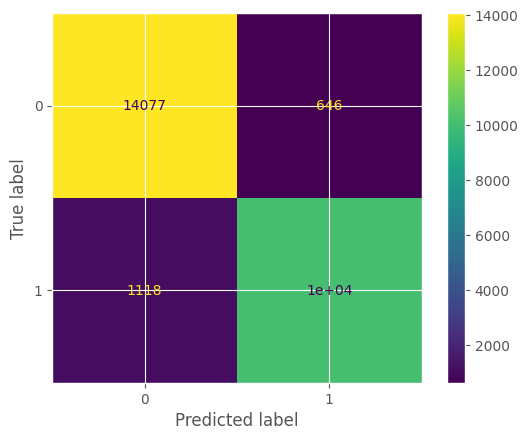

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


threshold = 0.5
y_pred_binary = np.where(y_pred > threshold, 1, 0)
cm = confusion_matrix(y_test, y_pred_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

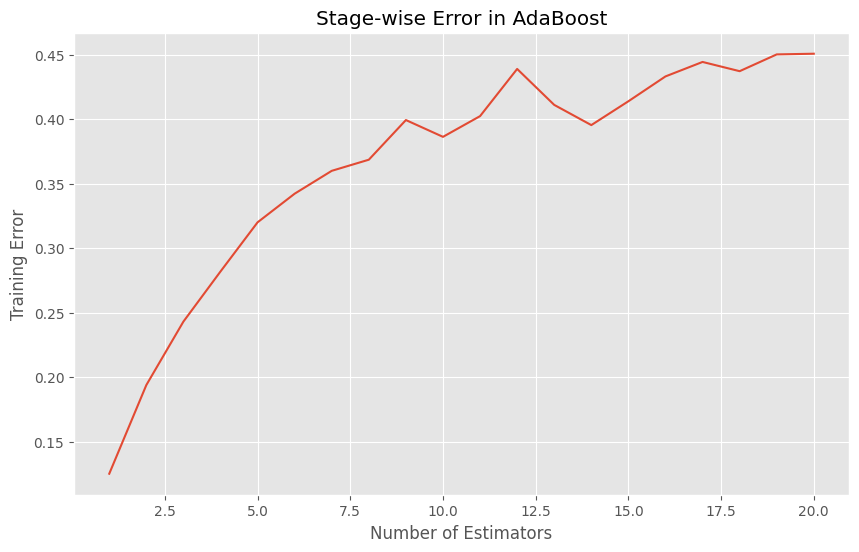

In [ ]:
stage_errors = adaboost.estimator_errors_[:40]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(stage_errors) + 1), stage_errors)
plt.xlabel("Number of Estimators")
plt.ylabel("Training Error")
plt.title("Stage-wise Error in AdaBoost")
plt.show()

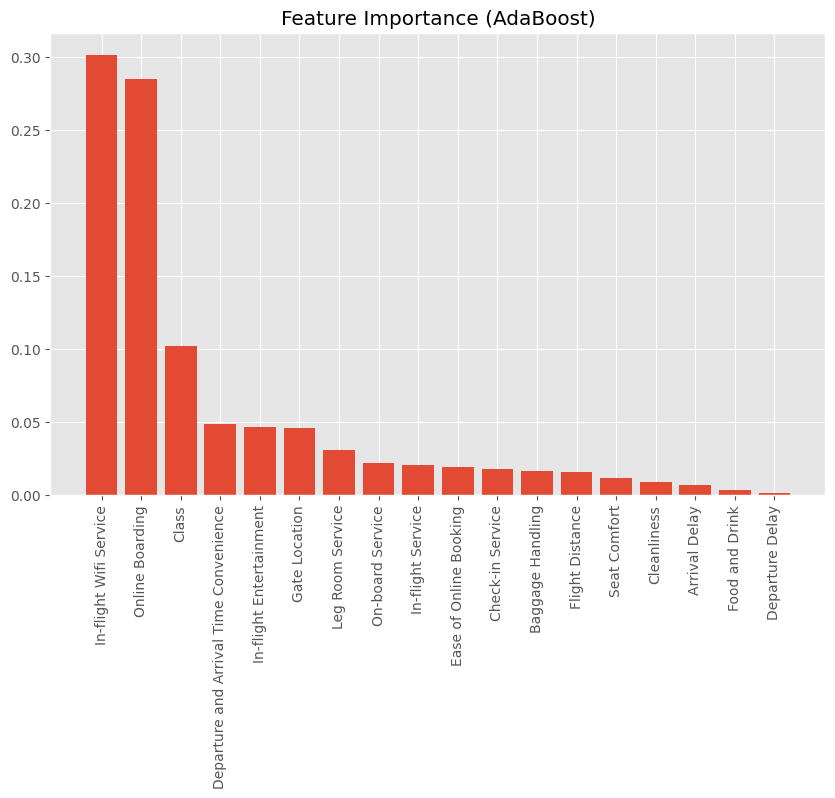

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = adaboost.feature_importances_

feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance (AdaBoost)')
plt.show()

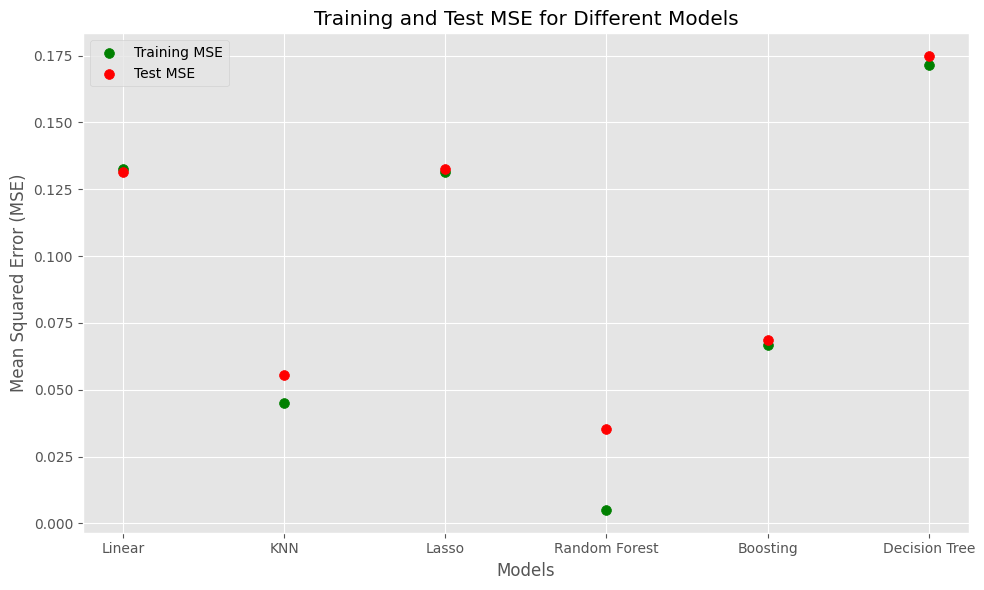

In [ ]:
import matplotlib.pyplot as plt

# MSE values for each model
lin_mse_tr = 0.1324
lin_mse_t = 0.1315
knn_mse_tr = 0.044896
knn_mse_t = 0.055588
las_mse_tr = 0.1315277628568716
las_mse_t = 0.13240099226198915
rfr_mse_tr = 0.00498
rfr_mse_t = 0.03524
boo_mse_tr = 0.0667
boo_mse_t = 0.0684
dec_mse_tr = 0.171466
dec_mse_t = 0.174815

# Model names
models = ['Linear','KNN', 'Lasso', 'Random Forest', 'Boosting', 'Decision Tree']

# Training and test MSE values
mse_tr = [lin_mse_tr, knn_mse_tr, las_mse_tr, rfr_mse_tr, boo_mse_tr, dec_mse_tr]
mse_t = [lin_mse_t, knn_mse_t, las_mse_t, rfr_mse_t, boo_mse_t, dec_mse_t]

# Plotting
plt.figure(figsize=(10, 6))

# Plotting Training MSE in green
plt.scatter(models, mse_tr, label="Training MSE", color='green', marker='o', s=50)  # Scatter plot

# Plotting Test MSE in red
plt.scatter(models, mse_t, label="Test MSE", color='red', marker='o', s=50)  # Scatter plot

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Test MSE for Different Models')
plt.legend()

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()